working with data set 3 churn.csv

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Admin\Desktop\pylearn-master\churn.csv",index_col=0) 
df

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
1,8260-NGFNY,One,Month-to-month,No,Mailed check,25.20,25.20,Female,0.0,No,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
2,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.70,4134.85,Female,0.0,Yes,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
3,6598/RFFVI,2,One year,No,Credit card (automatic),19.30,28.30,Male,0.0,No,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
4,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.10,521.30,Female,0.0,No,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
5,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.30,324.20,Female,0.0,No,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,9318-NKNFC,One,Month-to-month,Yes,Mailed check,18.85,18.85,Male,0.0,No,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
254,9067-SQTNS,44,One year,No,Bank transfer (automatic),20.60,926.00,Male,0.0,Yes,...,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
255,9067-SQTNS,44,One year,No,Bank transfer (automatic),20.60,926.00,Male,0.0,Yes,...,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
256,9067-SQTNS,44,One year,No,Bank transfer (automatic),20.60,926.00,Male,0.0,Yes,...,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No


In [21]:
duplicate=df[df.duplicated(['customerID'],keep='first')]
duplicate.shape[0]

7

The no. of duplicate records in the dataframe based on the cutomerID column are 7.

In [23]:
df.TotalCharges.isnull().sum() #find the missing value

15

In [24]:
df.MonthlyCharges.mean() # the average monthly charge paid by a customer for the services he/she has signed up for.

62.473481781376535

In [25]:
pd.crosstab(index=df.Dependents, columns='count') #counting the occurance of the variables

col_0,count
Dependents,
1@#,6
No,171
Yes,80


There are 6 records with 1@#, 171 records with No and 80 records with yes.

In [38]:
df.tenure #listing the data in the column tenure

1      One
2       39
3        2
4        6
5        4
      ... 
253    One
254     44
255     44
256     44
257     44
Name: tenure, Length: 257, dtype: object

In [49]:
#replacing the string 'Four' with the interger 4
df['tenure'].where(df['tenure']!='Four',4,inplace=True)
df['tenure'].where(df['tenure']!='One',1,inplace=True)
df.tenure=df.tenure.astype(int)
df.tenure

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


1       1
2      39
3       2
4       6
5       4
       ..
253     1
254    44
255    44
256    44
257    44
Name: tenure, Length: 257, dtype: int32

(array([ 86.,   0.,   0.,   0.,   0., 113.,   0.,   0.,   0.,  58.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

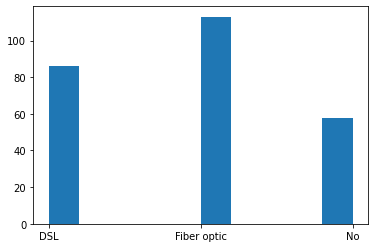

In [66]:
plt.hist(df['InternetService']) #data visualisation:histogram plot for different internet services

(array([55.,  0.,  0., 57.,  0.,  0., 80.,  0.,  0., 65.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

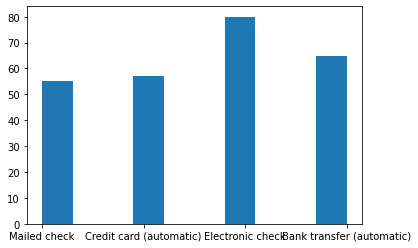

In [67]:
plt.hist(df['PaymentMethod']) #data visualisation:histogram plot for different payment methods

gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),26,39
Credit card (automatic),32,25
Electronic check,37,43
Mailed check,29,26


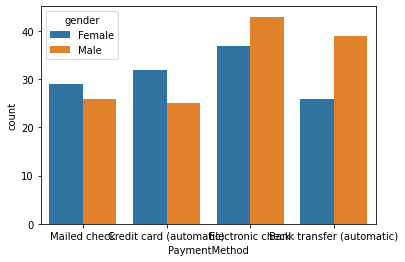

In [76]:
sns.countplot(x="PaymentMethod",data=df,hue="gender") #data visualisation:histogram plot for different payment methods used by the gender(male,female)
pd.crosstab(index=df['PaymentMethod'],columns=df['gender'],dropna=True)